# Airbnb price category prediction

* Airbnb price category prediction steps:-
    *   1- ✔️ Meme competition [optional]
    *   2- ✔️ Problem Formulation
    *   3- ✔️ Document your code
    *   4- ✔️ Model Tuning and Documentation
    *   5- ✔️ Answer some of questions (briefly)

1- ✔️ Meme competition [optional]:
* Include/find a MEME that you liked related to data science/data mining/machine learning. You can upload yours here
https://github.com/CISC-873/Information-2022/issues/1.

2- ✔️ Problem Formulation:
* Define the problem. What is the input? What is the output? What data mining function is required? What could be the challenges? What is the impact? What is an ideal solution?

**Define the problem**

`One of the biggest problems when people prepare to post a new listing on airbnb is, how much should one ask for? Of course the most intuitive way is to check how other similar postings price their apartment/house. So in this assignment, we are going to predict the listing price based on the listing characteristics and some images (In this problem, the task is to determine an appropriate listing price for a new listing on Airbnb. Instead of predicting the actual listing price using regression, the objective is to predict which pricing bin or range is appropriate for a new listing. A multi-objective approach is used to predict the price range of a new listing, along with the type of rental being advertised. To do so, a multi-modality approach is also applied, whereby images of a listing along with an accompanying text summary are used for training.).`

**What is the input?**

`The input is two columns one contain group of images and another contain summary and our target has two columns type column and price column`

**What is the output?** 

`The output is make classification and predict the listing price based on the listing characteristics
 or the input is images for different type of buildings (house,apartment and so on )`

**What data mining function is required?**
* Data Cleaning or Cleansing 
    * 1) Import the required Python libraries
    * 2) Read Data and images
    * 3) Some feature engineering
    * 4) Data Preprocessing
    
`In this step we need to clean the data to make it ready for any type of model classification , from scikit learn library to perform steps in sequence . In this problem we make classification so i used softmax as activation function to make classification The data mining functions required for this task are effective feature extraction from 2D images, along with effective feature extraction from a corpus of text`
* Data Split to Train and Test Sets
* Models that will be used:

   1) **GRU/LSTM layer**
   
   2) **Conv2d layer.**
   
   3) **Multi-modality learning**
   
   4) **Multi-objective learning**
   

**What could be the challenges?**
* `Challenges could arise from using small image dimensions (64x64x2), which may not contain sufficient detail or information to accurately predict price ranges. Additionally, enforcing a maximum sequence length on the input text summaries could potentially omit useful information when training, and a vocabulary that is too big could add noise to the model. Also, developing an effective sequence model for the text portion of this task will need to address the exploding/vanishing gradient problem with a sequence of 100 timesteps. Specifically for this task, there is the added challenge of having both English and French text summaries for the listings, which will have a negative impact on the model in terms of generalization.`
  
**What is the impact?**

` An ideal solution will address these challenges to accurately classify the appropriate price range for new Airbnb listings. The impact of this solution would streamline the workflow for using Airbnb as a host, and could help strengthen relationships and build trust with consumers renting these properties. However, this could result in hosts tailoring their summaries to take advantage of consumers to augment the true appeal of their listings`
   
**What is an ideal solution?**

` * The training and test datasets for a set of rental properties are loaded into pandas dataframes. Images are loaded as greyscale (2 channels), and re-sized into size 64x64x2. Text summaries are also loaded as strings.` 

` * Then, the text data is preprocessed by first fitting a tokenizer on all of the text summaries. This creates a vocabulary of 40000 unique words. This tokenizer is used to generate a sequence of integers for each summary using this vocabulary. A max sequence length of 100 words is enforced to truncate long sequences, and to pad shorter sequences with zeros to maintain consistent input dimensions.`

` * Embeddings are generated for the input text, and the average of the embeddings is computed for each sequence. A feature vector is created for the input images by passing their values through a 2D convolutional layer, using 2D max-pooling to reduce the size, and then flattening that output. These output vectors are concatenated and passed to a dense layer using softmax activation to perform separate multi-class classification tasks on price and type labels.`

# Data Cleaning or Cleansing

* Whenever we have to work with a real world dataset, the first problem that we face is to clean it. The real world dataset never comes clean. It consists lot of discrepancies in the dataset. So, we have to clean the dataset for further processing.

* Cleaning data is the process of preparing the dataset for analysis. It is very important because the accuracy of machine learning or data mining models are affected because of poor quality of data.

* So, data scientists spend a large amount of their time cleaning the dataset and transform them into a format with which they can work with. In fact, data scientists spend 80% of their time cleaning the data.

* A very common scenario is that the dataset contains missing values coded as NaN. Also, the missing values are coded in different ways. The dataset may contain negative or invalid values. It may contain outliers. It may be in the untidy format. All of these are examples of a messy dataset.

* In this project, I present several useful ways to handle these discrepancies in the dataset.

3- ✔️ Document your code

# * 1- Import the required Python libraries

In [1]:
!pip install googletrans
!pip install googletrans==4.0.0-rc1 #to avoid 'NoneType' object has no attribute 'group' error
!pip install googletrans==3.1.0a0 #to avoid 'NoneType' object has no attribute 'group' error

  Using cached googletrans-3.1.0a0-py3-none-any.whl
  Attempting uninstall: googletrans
    Found existing installation: googletrans 4.0.0rc1
    Uninstalling googletrans-4.0.0rc1:
      Successfully uninstalled googletrans-4.0.0rc1


In [2]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk

True

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import warnings #handling warning 
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
from PIL import Image
import pandas as pd #Pandas is mainly used for data analysis
import numpy as np  #used for working with arrays
from ast import literal_eval
from sklearn.model_selection import train_test_split
# Used to visualize distribution, trends and relationships of variables(visualization)
import seaborn as sns
import matplotlib.pyplot as plt # Is a cross-platform, data visualization and graphical plotting library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences #To convert tokenized array to a 2D array
from sklearn.model_selection import train_test_split
from pprint import pprint
from nltk.corpus import stopwords  # to Removing stop words with NLTK
from nltk.tokenize import word_tokenize #Tokenizers divide strings into lists of substrings
from tensorflow.keras import optimizers , Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.applications import VGG19
import collections
%matplotlib inline
#for translation
from deep_translator import GoogleTranslator # Translate text from source language to target language 
sns.set() #Set aesthetic parameters in one step.
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D , Dropout , LSTM , Embedding  , SimpleRNN , GRU

## 2-Load the dataset

In [4]:
# We have two datasets to import one for trainig and another for testing in csv formats 
Tr_df = pd.read_csv('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/train_xy.csv') # read train file 
Ts_df = pd.read_csv('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/test_x.csv') # read test file  

In [5]:
# We will deal first with training data 
Tr_df.head() #Used to show the first rows of the training data

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0


In [6]:
Ts_df.head() #Used to show the first rows of the test data 

,id,summary,image
0,0,Charming warm house is ready to host you here ...,img_test/0.jpg
1,1,"La chambre est spacieuse et lumineuse, dans un...",img_test/1.jpg
2,2,Grande chambre confortable située au sous-sol ...,img_test/2.jpg
3,3,"Près d’un Métro, ligne orange. 10 minutes à pi...",img_test/3.jpg
4,4,Very bright appartment and very cosy. 2 separa...,img_test/4.jpg


In [7]:
#display the shape of training and test data
print("Train shape: ", Tr_df.shape)
print("Test shape: ", Ts_df.shape)

Train shape:  (7627, 4)
Test shape:  (7360, 3)


In [8]:
# Some informations of data
Tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7627 entries, 0 to 7626
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  7326 non-null   object
 1   image    7627 non-null   object
 2   type     7627 non-null   object
 3   price    7627 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 238.5+ KB


In [9]:
Tr_df.price.value_counts() # Return a Series containing counts of unique values.

0    4737
1    2403
2     487
Name: price, dtype: int64

In [10]:
Tr_df['type'].isnull().sum() # Return a boolean same-sized object indicating if the values are NA

0

In [11]:
Tr_df['price'].isnull().sum() # Return a boolean same-sized object indicating if the values are NA

0

## Create a function For visualize the two labels 

In [12]:
# plot the percentage of price column 
def visualize_col(Col_name) :   
    df = Tr_df.groupby(Col_name).size()
    # Make the plot with pandas
    df.plot(kind='pie', subplots=True, figsize=(8, 8),shadow=True,autopct='%1.1f%%')
    plt.title('Pie Chart of' + Col_name + 'column')
    plt.ylabel("")
    plt.show()

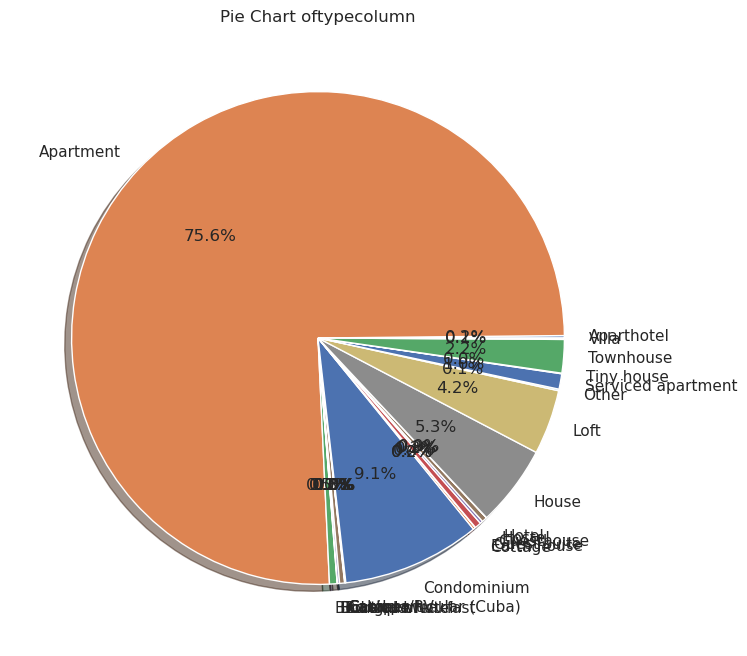

In [13]:
visualize_col('type')

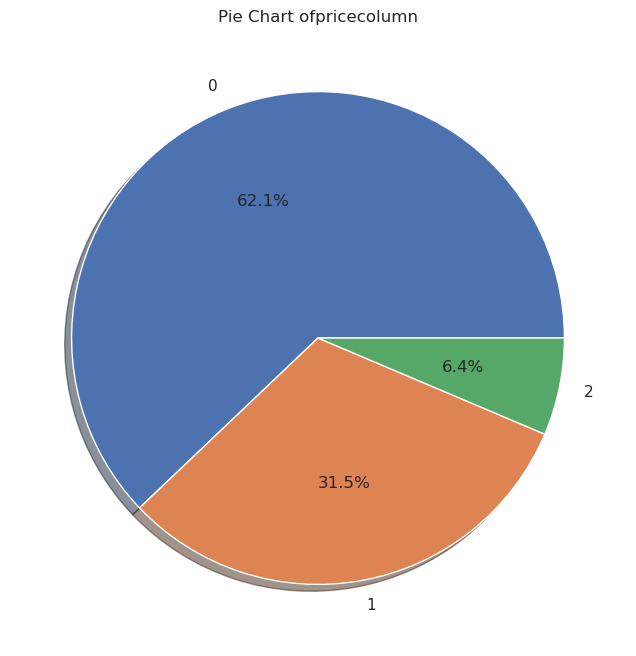

In [14]:
visualize_col('price')

# Data Preprocessing

As We have see from the info of that the data has image and text data.

 *  For Image data: We will make a function to resize it
 *  For Text data: tokenization and converting to integer IDs which also needed to be translated 

In [15]:
# define function called load_image to load image and resize it  to  64, 64 
def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((64, 64))  #opening image given in file and resize to size(64,64,2)
        Arr = np.array(image)             #converting to numpy array
    except:
        Arr = np.zeros((64, 64, 2))       #empty array in case of error in above try
    return Arr                            #return array of images

In [115]:
# loading train images:
Tr_image = np.array([load_image('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/'+str(i)) for i in tqdm(Tr_df["image"])])

Tr_text = Tr_df.summary.astype('str') # loading summary: (force convert some of the non-string cell to string)

  0%|          | 0/7326 [00:00<?, ?it/s]

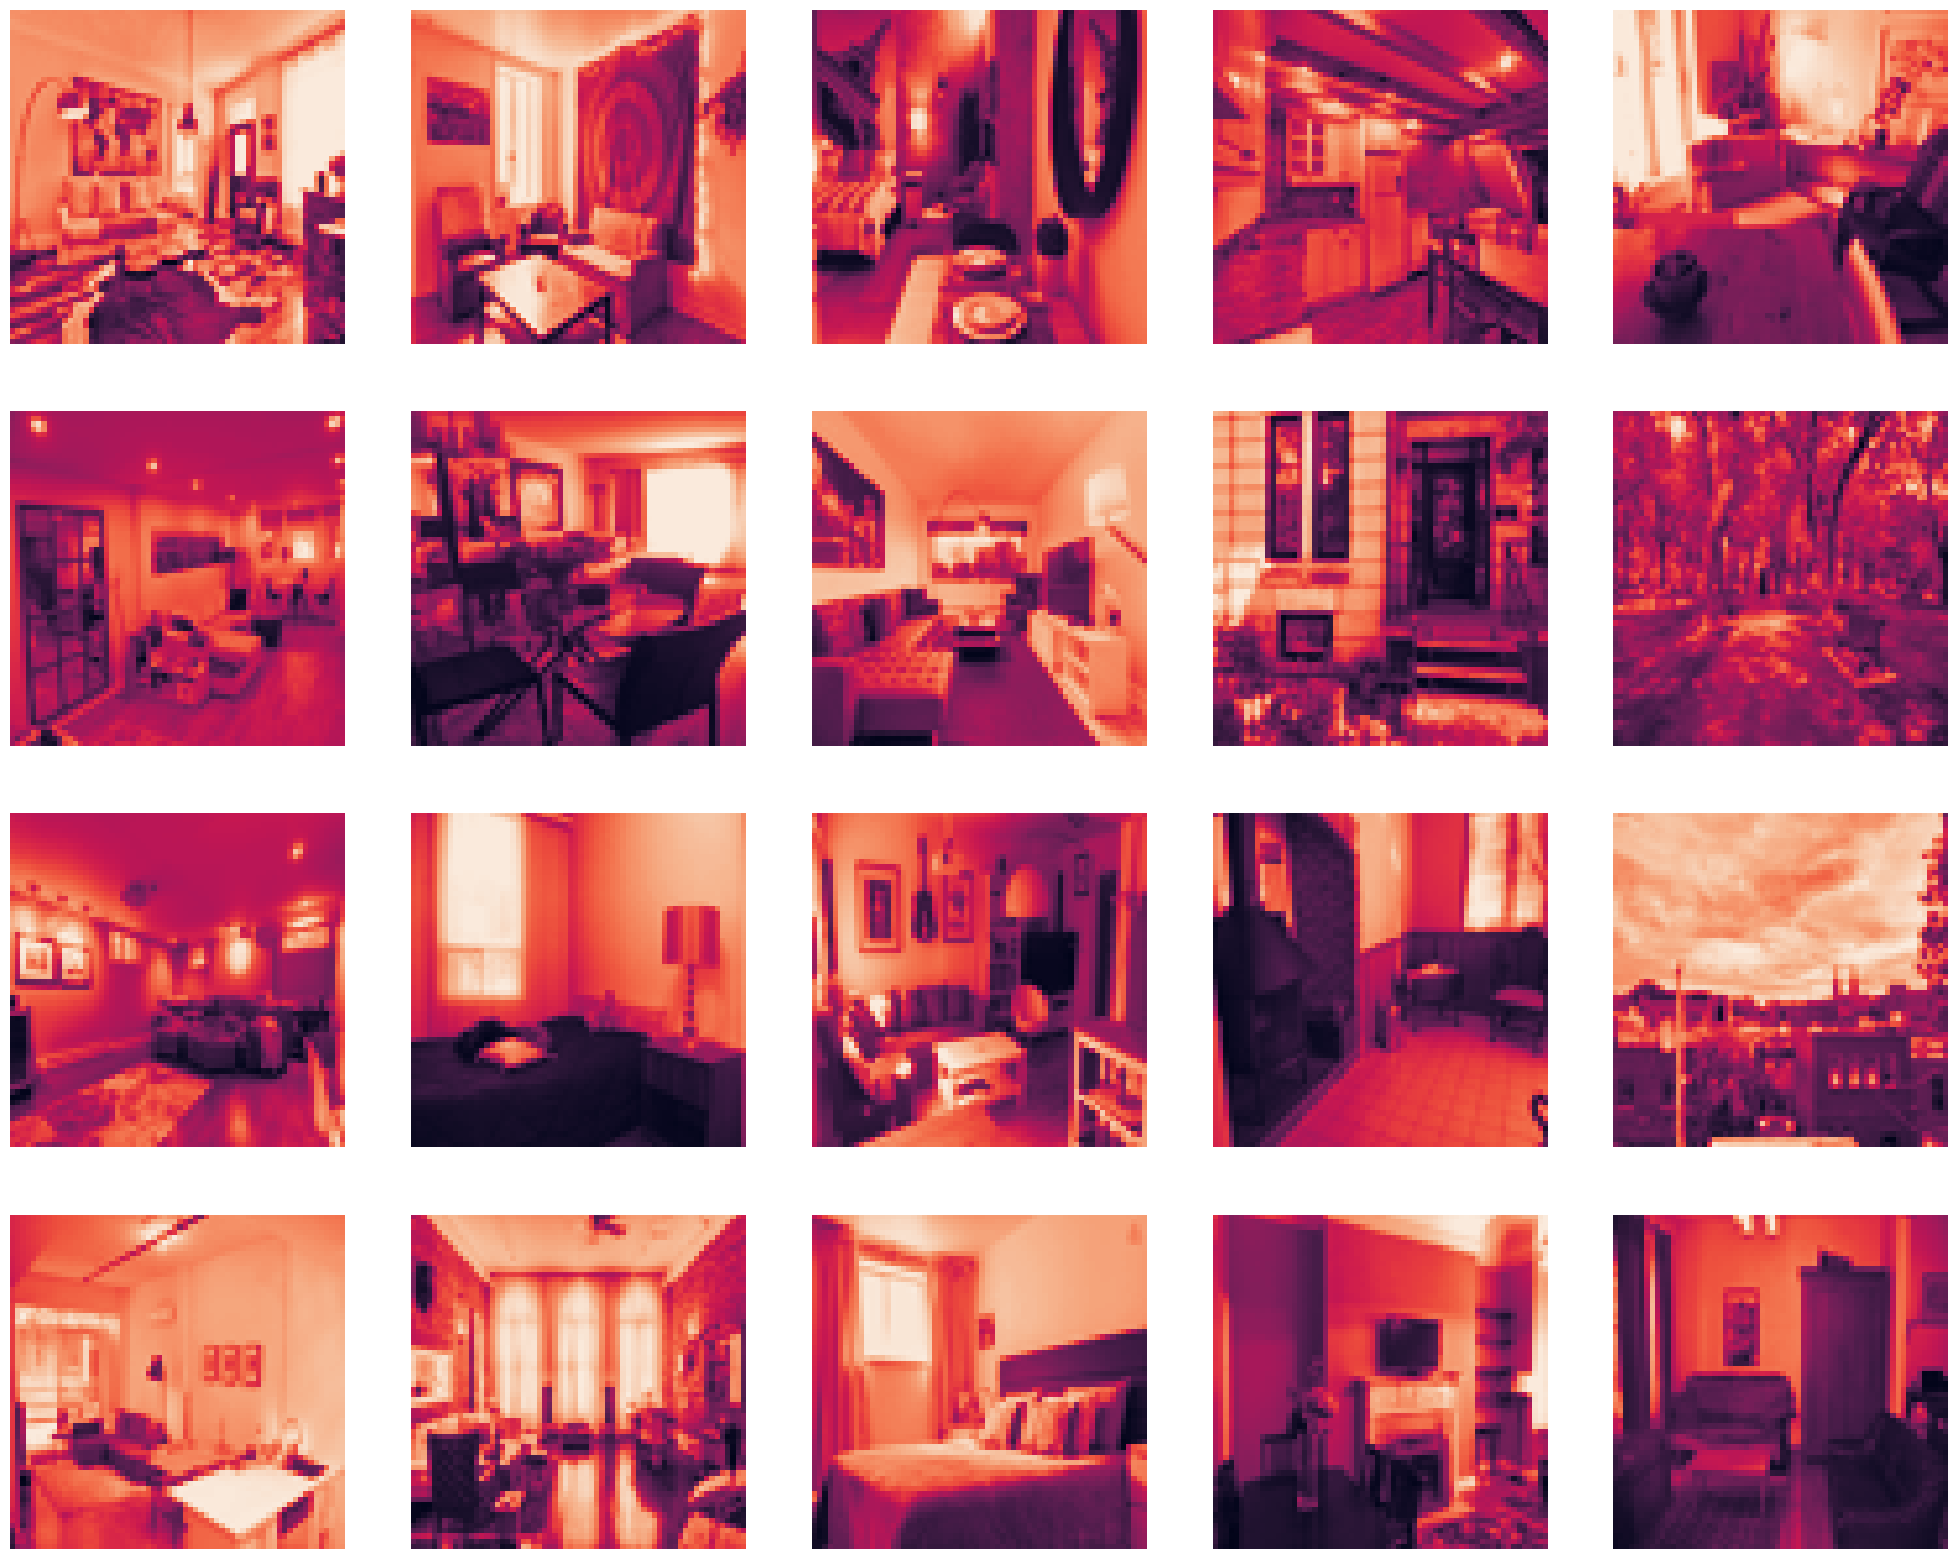

In [125]:
# checking load_image function and display some of the images after handling and their types
plt.figure(figsize=(25,20))
for n , i in enumerate(list(np.random.randint(0,len(Tr_image),20))) : 
    plt.subplot(4,5,n+1)
    plt.imshow(Tr_image[i, :, :,0])   
    plt.axis('off')
    plt.title((Tr_df['type'][i]))

## Encode the Prediction labels

In [18]:
#encode the prediction labels by converting the datatype of "type and price" column to categorical datatype 
Tr_df['type'] = Tr_df['type'].astype('category').cat.codes
Tr_df['price'] = Tr_df['price'].astype('category').cat.codes
#calculate the length of train data fro price and type columns
len_type = len(Tr_df['type'].unique())
len_price = len(Tr_df.price.unique())
# The labels 
Tr_Y_price = Tr_df['price'] # get price
Tr_Y_type = Tr_df['type'] # get type

In [19]:
Tr_df['summary'] # Show the text column

0       Spacious, sunny and cozy modern apartment in t...
1       Located in one of the most vibrant and accessi...
2       Logement coquet et douillet à 10 minutes du ce...
3       Beautiful and spacious (1076 sc ft, / 100 mc) ...
4       Très grand appartement ''rustique'' et très ag...
                              ...                        
7622    Un grand logement 4 et 1/2, tout inclut, bien ...
7623    Magnificent condo directly on the river. You w...
7624    This apartment is perfect for anyone visiting ...
7625    It is a cozy ,clean ,and comfortable apartment...
7626    Modern country style (newly-renovated); open c...
Name: summary, Length: 7627, dtype: object

### As we see in the text columns we need to translator to translate any other language to english

 ### Apply Tokenizer and pad_sequences

In [20]:
# preprocess text data
vocab_size = 40000 # i define the number of dictionary vocab by 40000 word 
max_len = 100 # define the maximum number of words in each row 

# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)
"""Updates internal vocabulary based on a list of texts.In the case where texts contains lists, 
we assume each entry of the lists to be a token. Required before using texts_to_sequences or texts_to_matrix."""
tokenizer.fit_on_texts(Tr_text)

# define function called _preprocess take text and make pad_sequences function and apply tokenizer
"""Pads sequences to the same length. This function transforms a list (of length num_samples)
of sequences (lists of integers) into a 2D Numpy array of shape (num_samples, num_timesteps).
num_timesteps is either the maxlen argument if provided, or the length of the longest sequence in the list."""
def _preprocess(list_of_text):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text),  #Transforms each text in texts to a sequence of integers.
        maxlen=max_len,         #Optional Int, maximum length of all sequences. If not provided, sequences
                                # will be padded to the length of the longest individual sequence.
        padding='post',#String, 'pre' or 'post' (optional, defaults to 'pre'): pad either before or after each sequence.
    )

In [21]:
Tr_text_id = _preprocess(Tr_text) # padding is done inside
# print the shape of x_train_text_id 
print(Tr_text_id.shape)

(7627, 100)


### Data Preprocessing For Testing data, Here we use the trained tokenizer to pre-process the testing set.

In [126]:
Ts_image = np.array([load_image('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/'+str(i)) for i in tqdm(Ts_df["image"])]) # loading images

  0%|          | 0/7360 [00:00<?, ?it/s]

In [23]:
# loading summary: (force convert some of the non-string cell to string)
Ts_text_id = _preprocess(Ts_df.summary.astype('str'))

In [24]:
# Plotting Accuracy & Loss
def Results_vir(history):

  # generate a figure containing 3 plots displayed horizontally
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25,7))
  fig.suptitle('Model Results')
  
  #first plot
  # first we display the training price accuracy in red color VS. the validation price accuracy in blue color through the epochs
  ax1.plot(history.history['price_sparse_categorical_accuracy'], 'r')
  ax1.plot(history.history['val_price_sparse_categorical_accuracy'], 'b')
  ax1.set_title('price accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epochs')
  ax1.legend(['tr_price_acc', 'val_price_acc'])
  ax1.grid()

  #second plot
  # on this axis, we plot the price training loss in red color VS. the price validation loss in blue color through the epochs
  ax2.plot(history.history['price_loss'], 'r')
  ax2.plot(history.history['val_price_loss'], 'b')
  ax2.set_title('price loss')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  ax2.legend(['tr_price_loss', 'val_price_loss'])
  ax2.grid()

  #third plot
  # on the last axis, we plot the training loss in red color VS. the validation loss in blue color through the epochs
  ax3.plot(history.history['loss'], 'r')
  ax3.plot(history.history['val_loss'], 'b')
  ax3.set_title('model loss')
  ax3.set_ylabel('loss')
  ax3.set_xlabel('epoch')
  ax3.legend(['tr_loss', 'val_loss'])
  ax3.grid()

  plt.show() # display the figure
  


## Trial 1 (No summary translation) 

* In this trial, i use `2D convolution` layer (e.g. spatial convolution over images). This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs to work on the images.
* I use `maxpool2d` to Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
* The window is shifted by strides along each dimension.  A `Flatten` layer in Keras reshapes the tensor to have a shape that is equal to the number of elements contained in the tensor. `embedded`
* An embedding is a dense vector of floating point values (the length of the vector is a parameter you specify). Instead of specifying the values for the embedding manually, they are trainable parameters (weights learned by the model during training, in the same way a model learns weights for a dense layer).

In [25]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))          # input shape for batches of text sequences (300 words long)
in_image = keras.Input(batch_shape=(None, 64, 64, 2))       # input shape for batches of images (size: 64x64x2)

# text part
# simple average of embedding. 
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text) # get our word embeddings
averaged = tf.reduce_mean(embedded, axis=1)   # compute the mean of the embeddings to reduce the rank of the embedding
#___________________________________________________________________________________________________
# image part 
# simple conv2d.
cov1 = Conv2D(10, (16, 16) , activation='relu')(in_image)  # convolutional layer with 10 filters, and a 16x16 mask, no padding
dropout = Dropout(.4) (cov1) 
pl = MaxPool2D((16, 16))(dropout)                         # max pooling with a 16x16 mask, reducing the size to 3x3x10
flattened = Flatten()  (pl)                               # flatten the shape to (90,)
#___________________________________________________________________________________________________
# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)        # concatenate text features with images

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)
#___________________________________________________________________________________________________
# define model input/output using keys.
Model_1 = keras.Model(
    inputs={
        'summary': in_text,  # text inputs
        'image': in_image  },  # images inputs     
    outputs={
        'type': p_type,      # label 1: type category [0-23]
        'price': p_price  } # label 2: price category (0, 1, or 2)
)
#___________________________________________________________________________________________________
# compile model with optimizer, loss values for each task, 
# loss weights for each task.
Model_1.compile(
    optimizer= Adam(.001),       # using Adam for optimization with learning rate (.001)
    loss={
        'type': 'sparse_categorical_crossentropy', # measuring sparse categorical cross-entropy loss for both price and type labels
        'price': 'sparse_categorical_crossentropy',# sparse categorical cross-entropy is used since our labels are integers
    },

    loss_weights={  # Not equally weight the loss w.r.t. both labels as we care more with price
        'type': 0,
        'price': 1.0,       
    },

    metrics={  # evaluation metric for this task is accuracy, so we measure sparse categorical accuracy for both targets
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)
# display the structure of the model that we defined  
Model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 10)   5130        ['input_2[0][0]']                
                                                                                                  
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 dropout (Dropout)              (None, 49, 49, 10)   0           ['conv2d[0][0]']                 
                                                                                              

##### Model Training Based on the training/validation performance, you can adjust the epochs to be trained so from the output of validation we can stop in epoch 8 this is the best value. Early stoping is watching the validation loss on price prediction (assuming that it is the main task we would like to perform). i used here translated data and use in fit 10 epochs we can observe that the until epoch 5 we have best val_price_accuracy_score

In [26]:
history = Model_1.fit(
    x={
        'summary': Tr_text_id,
        'image': Tr_image
    },
    y={
        'type': Tr_Y_type,
        'price': Tr_Y_price,
    },
    epochs=5,
    batch_size=19,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10, )
    ],
    verbose=1
)

Epoch 1/5


2023-04-14 01:46:29.608161: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


322/322 [==============================] - 37s 90ms/step - loss: 0.8348 - price_loss: 0.8348 - type_loss: 3.1567 - price_sparse_categorical_accuracy: 0.6237 - type_sparse_categorical_accuracy: 0.0046 - val_loss: 0.7729 - val_price_loss: 0.7729 - val_type_loss: 3.1545 - val_price_sparse_categorical_accuracy: 0.6409 - val_type_sparse_categorical_accuracy: 0.0066
Epoch 2/5
322/322 [==============================] - 10s 30ms/step - loss: 0.7308 - price_loss: 0.7308 - type_loss: 3.1557 - price_sparse_categorical_accuracy: 0.6637 - type_sparse_categorical_accuracy: 0.0044 - val_loss: 0.7163 - val_price_loss: 0.7163 - val_type_loss: 3.1557 - val_price_sparse_categorical_accuracy: 0.6848 - val_type_sparse_categorical_accuracy: 0.0052
Epoch 3/5
322/322 [==============================] - 6s 18ms/step - loss: 0.6456 - price_loss: 0.6456 - type_loss: 3.1564 - price_sparse_categorical_accuracy: 0.7182 - type_sparse_categorical_accuracy: 0.0044 - val_loss: 0.7002 - val_price_loss: 0.7002 - val_type_

In [27]:
# we can do prediction on training set
y_predict = Model_1.predict(
    {
        'summary': Ts_text_id,
        'image': Ts_image
    }
)
price_predicted = y_predict['price'] # probabilities
price_category_predicted = np.argmax(price_predicted, axis=1) # categories

230/230 [==============================] - 1s 2ms/step


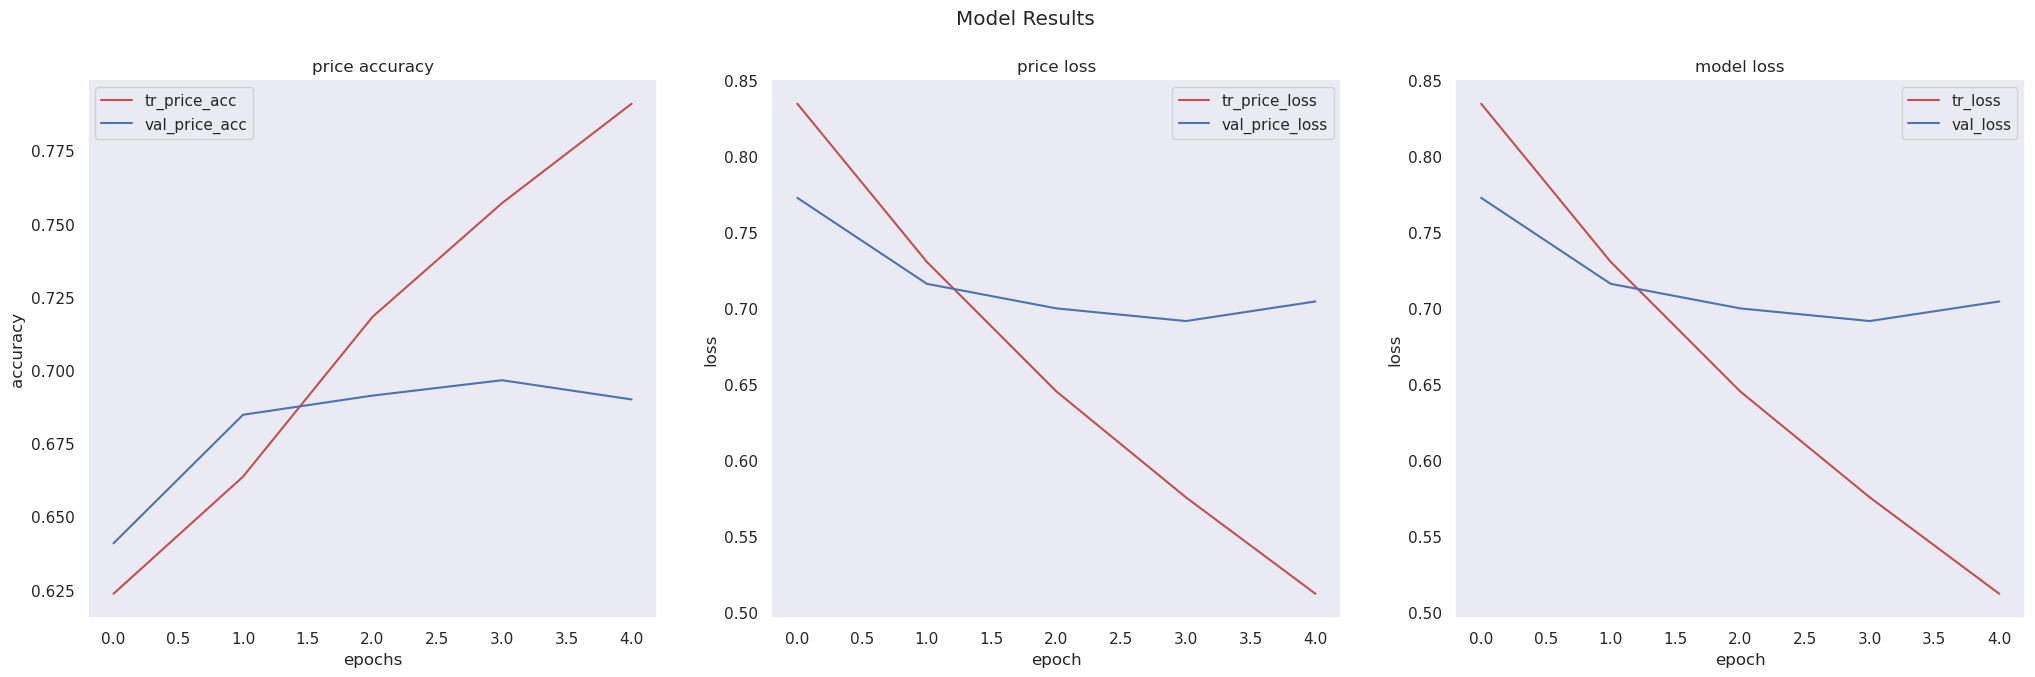

In [28]:
Results_vir(history)

In [29]:
#___________________________CSV creator which will be used to save the csv file_______________________________________________
pd.DataFrame(
    {'id': Ts_df.index,
     'price': price_category_predicted}
).to_csv('Model_1_submission.csv', index=False)

**OBSERVATION_1**

> In this trial we start with 2D convolution layer with No summary translation

> The score on local was ~68.88%  

> I think this classifier will be the best classifier in the private score on kaggle 


# Trial 2 (Also No summary translation)

### Here, i used the same layers but with different shapes for filters and filters number and another shape for maxpool2d

In [30]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))
#___________________________________________________________________________________________________
# text part
embedded = Embedding(tokenizer.num_words, 100)(in_text) # simple average of embedding. you can change it to anything else as needed
lst = LSTM(64)(embedded)
dense= Dense(32,activation='relu')(lst) # lst2 = LSTM(64)(lst)
#___________________________________________________________________________________________________
# image part 
# simple conv2d. you can change it to anything else as needed
cov1 = Conv2D(64, (15, 15) , activation='relu')(in_image) # 32 number of filters  and  (16, 16) size of filter
pl = MaxPool2D((5, 5))(cov1)
flattened = Flatten()(pl)
fused = tf.concat([dense, flattened], axis=-1) # fusion - combinig both

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)

#___________________________________________________________________________________________________
# define model input/output using keys.
Model_2 = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image  },
    outputs={
        'type': p_type,
        'price': p_price,  },
)
#___________________________________________________________________________________________________
# compile model with optimizer, loss values for each task, loss 
# weights for each task.
Model_2.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5, },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'], },
)

Model_2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 100, 100)     4000000     ['input_3[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 50, 50, 64)   28864       ['input_4[0][0]']                
                                                                                            

In [31]:
history = Model_2.fit(
    x={
        'summary': Tr_text_id,
        'image': Tr_image  },
    y={
        'type': Tr_Y_type,
        'price': Tr_Y_price, },
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10, )
    ],
    verbose=1
)

Epoch 1/5
191/191 [==============================] - 28s 128ms/step - loss: 1.0700 - price_loss: 0.8606 - type_loss: 1.2794 - price_sparse_categorical_accuracy: 0.6189 - type_sparse_categorical_accuracy: 0.7500 - val_loss: 0.9125 - val_price_loss: 0.8363 - val_type_loss: 0.9887 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 2/5
191/191 [==============================] - 11s 55ms/step - loss: 0.9304 - price_loss: 0.8400 - type_loss: 1.0208 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9115 - val_price_loss: 0.8363 - val_type_loss: 0.9867 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 3/5
191/191 [==============================] - 6s 34ms/step - loss: 0.9303 - price_loss: 0.8401 - type_loss: 1.0206 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9054 - val_price_loss: 0.8315 

In [32]:
# we can do prediction on training set
y_predict = Model_2.predict(
    {
        'summary': Ts_text_id,
        'image': Ts_image
    }
)
price_predicted = y_predict['price'] # probabilities
price_category_predicted = np.argmax(price_predicted, axis=1) # categories

230/230 [==============================] - 1s 4ms/step


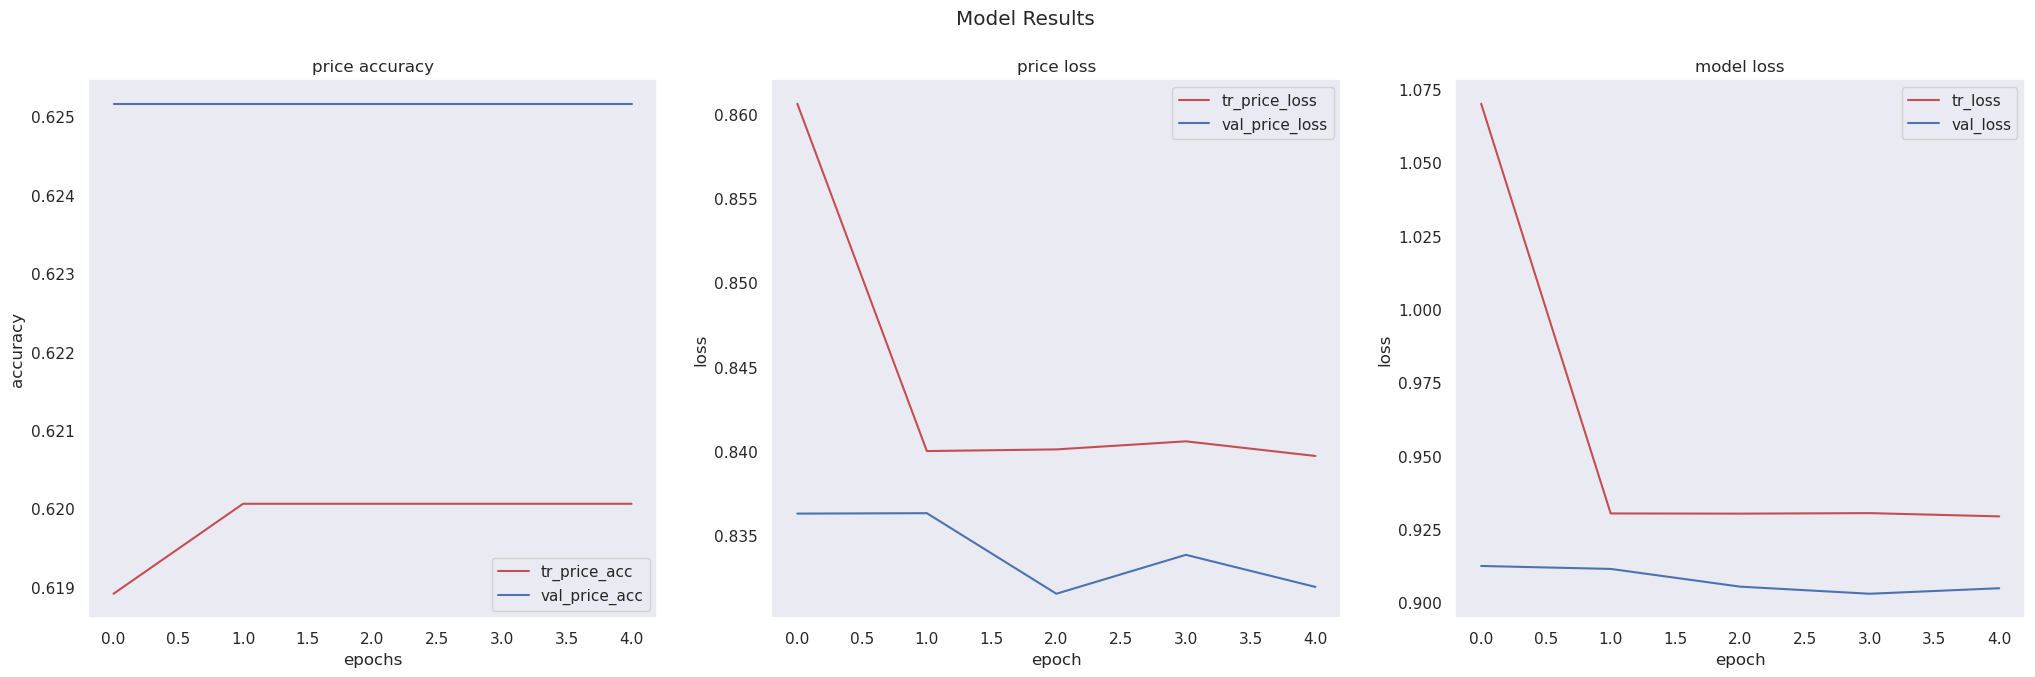

In [33]:
Results_vir(history)

In [34]:
#___________________________CSV creator which will be used to save the csv file_______________________________________________
pd.DataFrame(
    {'id': Ts_df.index,
     'price': price_category_predicted}
).to_csv('Model_2_submission.csv', index=False)

**OBSERVATION_2**

> In this trial we start with 2D convolution layer with No summary translation but with different filter numbers and shapes

> The score on local was ~62%  

> We need more improvements 

# Trial 3 (Also No summary translation)

* Bi-directional Recurrent Layers (LSTM and GRU) Thoughts and observations from the previous trails: A slight performance improvement was realized after adding depth to the CNN portion of the network, but this also resulted in overfitting.

* For trial 3: The performance is alright, but let's see what happens if we add bidirectionality to the GRU layer.

In [35]:
from tensorflow.keras.layers import Bidirectional # used to implement bidirectional RNNs (LSTM, GRU)

in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)
#___________________________________________________________________________________________________
# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
bi_lstm = Bidirectional(GRU(20))(embedded) # creating a bidirectional GRU layer
#___________________________________________________________________________________________________
# image part
cov = Conv2D(32, (3, 3))(in_image) # convolutional layer with 32 filters, and a 16x16 mask, no padding
pl = MaxPool2D((3, 3))(cov) # max pooling with a 3x3 mask, reducing the size to 20x20x32
cov2 = Conv2D(32, (2,2))(pl) # convolutional layer with 32 filters, and a 2x2 mask, no padding
pl2 = MaxPool2D((2,2))(cov2) # max pooling with a 2x2 mask, reducing the size to 9x9x32
flattened = Flatten()(pl2) # flatten the shape to (2592,)

# fusion:
fused = tf.concat([bi_lstm, flattened], axis=-1) # concatenate text features with images
# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]
#___________________________________________________________________________________________________
# model definition
Model_3 = keras.Model(
    inputs={
        'summary': in_text,   # text inputs
        'image': in_image  }, # image inputs 
    outputs={
        'price': p_price,  # label 1: price category (0, 1, or 2)
        'type': p_type, }, # label 2: type category [0-23]  
)
#___________________________________________________________________________________________________
# compiling the bidirectional model and printing a summary of the architecture
Model_3.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy', },
    loss_weights={
        'type': 0.5,
        'price': 0.5, },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'], },
)
Model_3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 62, 62, 32)   608         ['input_6[0][0]']                
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 20, 20, 32)  0           ['conv2d_2[0][0]']               
                                                                                                  
 input_5 (InputLayer)           [(None, 100)]        0           []                               
                                                                                            

In [36]:
history = Model_3.fit(
    x={
        'summary': Tr_text_id,
        'image': Tr_image  },
    y={
        'type': Tr_Y_type,
        'price': Tr_Y_price, },
    epochs=15,
    batch_size=32,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10, ) ],
    verbose=1
)

Epoch 1/15
191/191 [==============================] - 21s 86ms/step - loss: 0.9946 - price_loss: 0.8457 - type_loss: 1.1434 - price_sparse_categorical_accuracy: 0.6224 - type_sparse_categorical_accuracy: 0.7500 - val_loss: 0.8427 - val_price_loss: 0.7603 - val_type_loss: 0.9250 - val_price_sparse_categorical_accuracy: 0.6586 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 2/15
191/191 [==============================] - 9s 45ms/step - loss: 0.8040 - price_loss: 0.7297 - type_loss: 0.8784 - price_sparse_categorical_accuracy: 0.6750 - type_sparse_categorical_accuracy: 0.7607 - val_loss: 0.8036 - val_price_loss: 0.7414 - val_type_loss: 0.8658 - val_price_sparse_categorical_accuracy: 0.6573 - val_type_sparse_categorical_accuracy: 0.7765
Epoch 3/15
191/191 [==============================] - 5s 28ms/step - loss: 0.7163 - price_loss: 0.6510 - type_loss: 0.7816 - price_sparse_categorical_accuracy: 0.7258 - type_sparse_categorical_accuracy: 0.7782 - val_loss: 0.8082 - val_price_loss: 0.7419

In [37]:
# we can do prediction on training set
y_predict = Model_3.predict(
    {
        'summary': Ts_text_id,
        'image': Ts_image
    }
)
price_predicted = y_predict['price'] # probabilities
price_category_predicted = np.argmax(price_predicted, axis=1) # categories

230/230 [==============================] - 2s 5ms/step


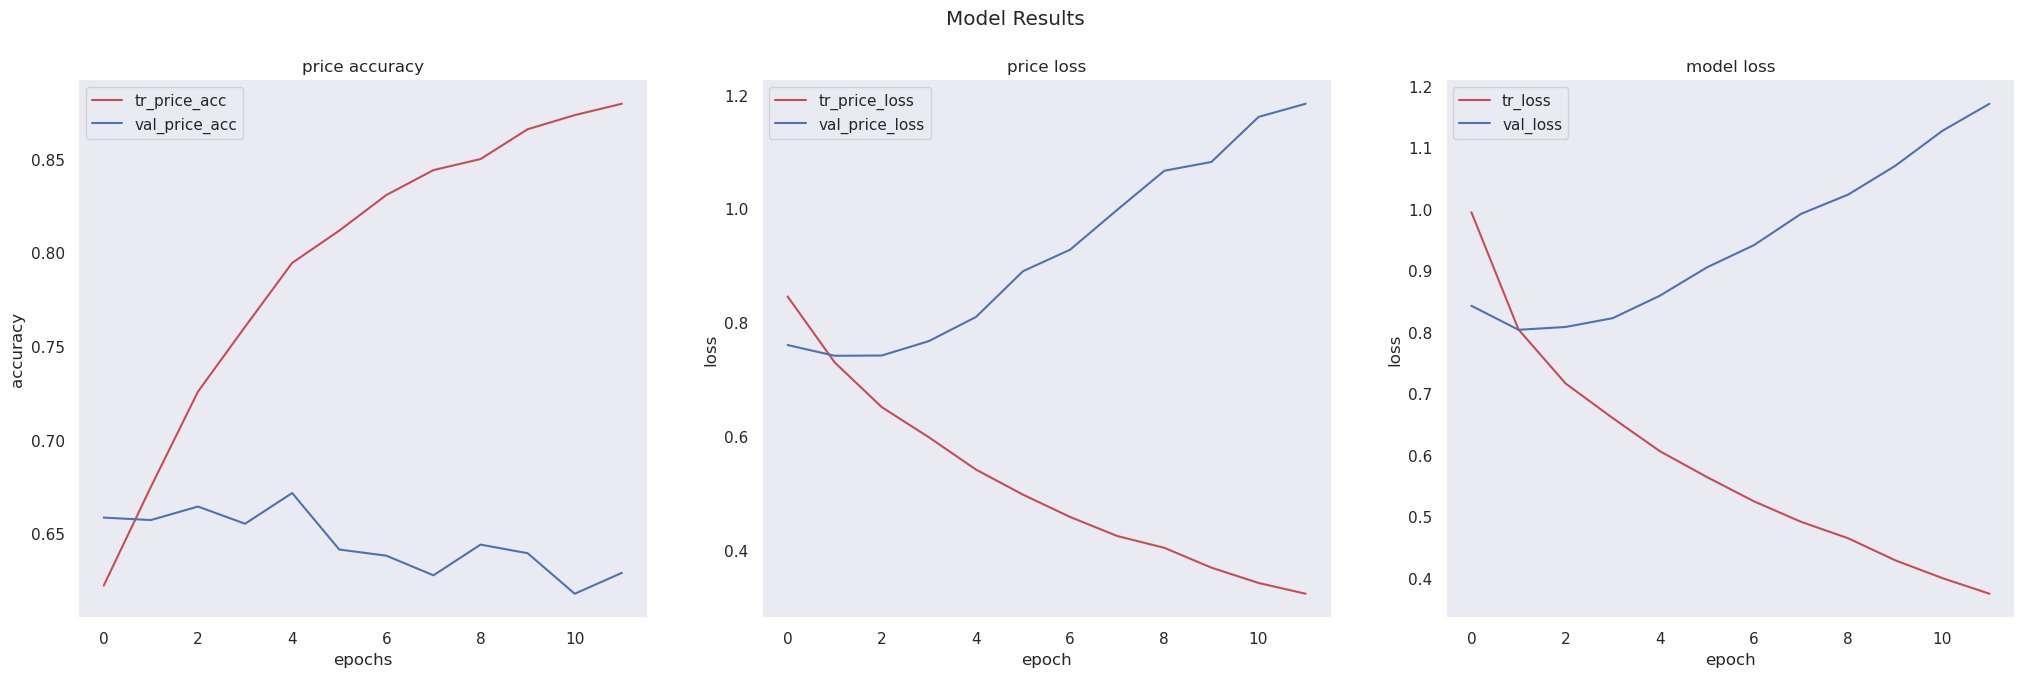

In [38]:
Results_vir(history)

In [39]:
#___________________________CSV creator which will be used to save the csv file_______________________________________________
pd.DataFrame(
    {'id': Ts_df.index,
     'price': price_category_predicted}
).to_csv('Model_3_submission.csv', index=False)

**OBSERVATION_3**

> In this trial we start with bidirectional GRU layer with No summary translation

> The score on local was ~62.8%  

> We need more improvements 

# Trial 4

**Regularization using Drop-out, L2**
* In the previous trials We're still overfitting, and have yet to realize a performance improvement in recent trials.

* For trial 4: Add drop-out regularization in the image component of the model to reduce the overfitting behaviour. Also using L2 recurrent regularization on the text component of the model.

In [40]:
from tensorflow.keras.layers import Bidirectional # used to implement bidirectional RNNs (LSTM, GRU)
from tensorflow.keras.layers import Dropout

in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2)) # input shape for batches of images (size 64x64x2)
#___________________________________________________________________________________________________
# text part
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text) # get our word embeddings
bi_lstm = Bidirectional(GRU(20, recurrent_regularizer='l2'))(embedded) # adding quadratic regularizer
#___________________________________________________________________________________________________
# image part
cov = Conv2D(32, (3, 3))(in_image) # convolutional layer with 32 filters, and a 16x16 mask, no padding
drop = Dropout(0.2)(cov) # 20% dropout
pl = MaxPool2D((3, 3))(drop) # max pooling with a 3x3 mask, reducing the size to 20x20x32
cov2 = Conv2D(32, (2,2))(pl) # convolutional layer with 32 filters, and a 2x2 mask, no padding
drop2 = Dropout(0.2)(cov2) # 20% dropout
pl2 = MaxPool2D((2,2))(drop2) # max pooling with a 2x2 mask, reducing the size to 9x9x32
flattened = Flatten()(pl2) # flatten the shape to (2592,)

# fusion:
fused = tf.concat([bi_lstm, flattened], axis=-1) # concatenate text features with images

# multi-objectives (each is a multi-class classification)
p_price = Dense(len_price, activation='softmax', name='price')(fused) # predict price label 0, 1, or 2
p_type = Dense(len_type, activation='softmax', name='type')(fused) # predict rental category label [0-23]
#___________________________________________________________________________________________________
# model definition
Model_4 = keras.Model(
    inputs={
        'summary': in_text, # text inputs
        'image': in_image }, # image inputs 
    outputs={
        'price': p_price, # label 1: price category (0, 1, or 2)
        'type': p_type,   }, # label 2: type category [0-23]
)
#___________________________________________________________________________________________________

# compiling the bidirectional model (with regularization) and printing a summary of the architecture
Model_4.compile(
    optimizer= Adam(),       # using Adam for optimization with learning rate (.001)
    # measuring sparse categorical cross-entropy loss for both price and type labels
    # sparse categorical cross-entropy is used since our labels are integers
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy', },
    # Not equally weight the loss w.r.t. both labels as we care more with price
    loss_weights={
        'type': 0.5,
        'price': 0.5,},
    # evaluation metric for this task is accuracy, so we measure sparse categorical accuracy for both targets
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)
# display the structure of the model that we defined  
Model_4.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 62, 62, 32)   608         ['input_8[0][0]']                
                                                                                                  
 dropout_1 (Dropout)            (None, 62, 62, 32)   0           ['conv2d_4[0][0]']               
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 20, 20, 32)  0           ['dropout_1[0][0]']              
                                                                                            

In [41]:
history = Model_4.fit(
    x={
        'summary': Tr_text_id,
        'image': Tr_image    },
    y={
        'type': Tr_Y_type,
        'price': Tr_Y_price,   },
    epochs=10,
    batch_size=19,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10, )
    ],
    verbose=1
)

Epoch 1/10


2023-04-14 01:50:35.072334: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_3/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


322/322 [==============================] - 36s 96ms/step - loss: 1.0655 - price_loss: 0.8359 - type_loss: 1.0963 - price_sparse_categorical_accuracy: 0.6165 - type_sparse_categorical_accuracy: 0.7505 - val_loss: 0.8816 - val_price_loss: 0.7608 - val_type_loss: 0.9804 - val_price_sparse_categorical_accuracy: 0.6547 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 2/10
322/322 [==============================] - 11s 34ms/step - loss: 0.8291 - price_loss: 0.7419 - type_loss: 0.8936 - price_sparse_categorical_accuracy: 0.6635 - type_sparse_categorical_accuracy: 0.7622 - val_loss: 0.8292 - val_price_loss: 0.7593 - val_type_loss: 0.8770 - val_price_sparse_categorical_accuracy: 0.6140 - val_type_sparse_categorical_accuracy: 0.7779
Epoch 3/10
322/322 [==============================] - 8s 24ms/step - loss: 0.7470 - price_loss: 0.6730 - type_loss: 0.7920 - price_sparse_categorical_accuracy: 0.7046 - type_sparse_categorical_accuracy: 0.7794 - val_loss: 0.8106 - val_price_loss: 0.7363 - val_typ

In [42]:
# we can do prediction on training set
y_predict = Model_4.predict(
    {
        'summary': Ts_text_id,
        'image': Ts_image }
)
price_predicted = y_predict['price'] # probabilities
price_category_predicted = np.argmax(price_predicted, axis=1) # categories


230/230 [==============================] - 2s 5ms/step


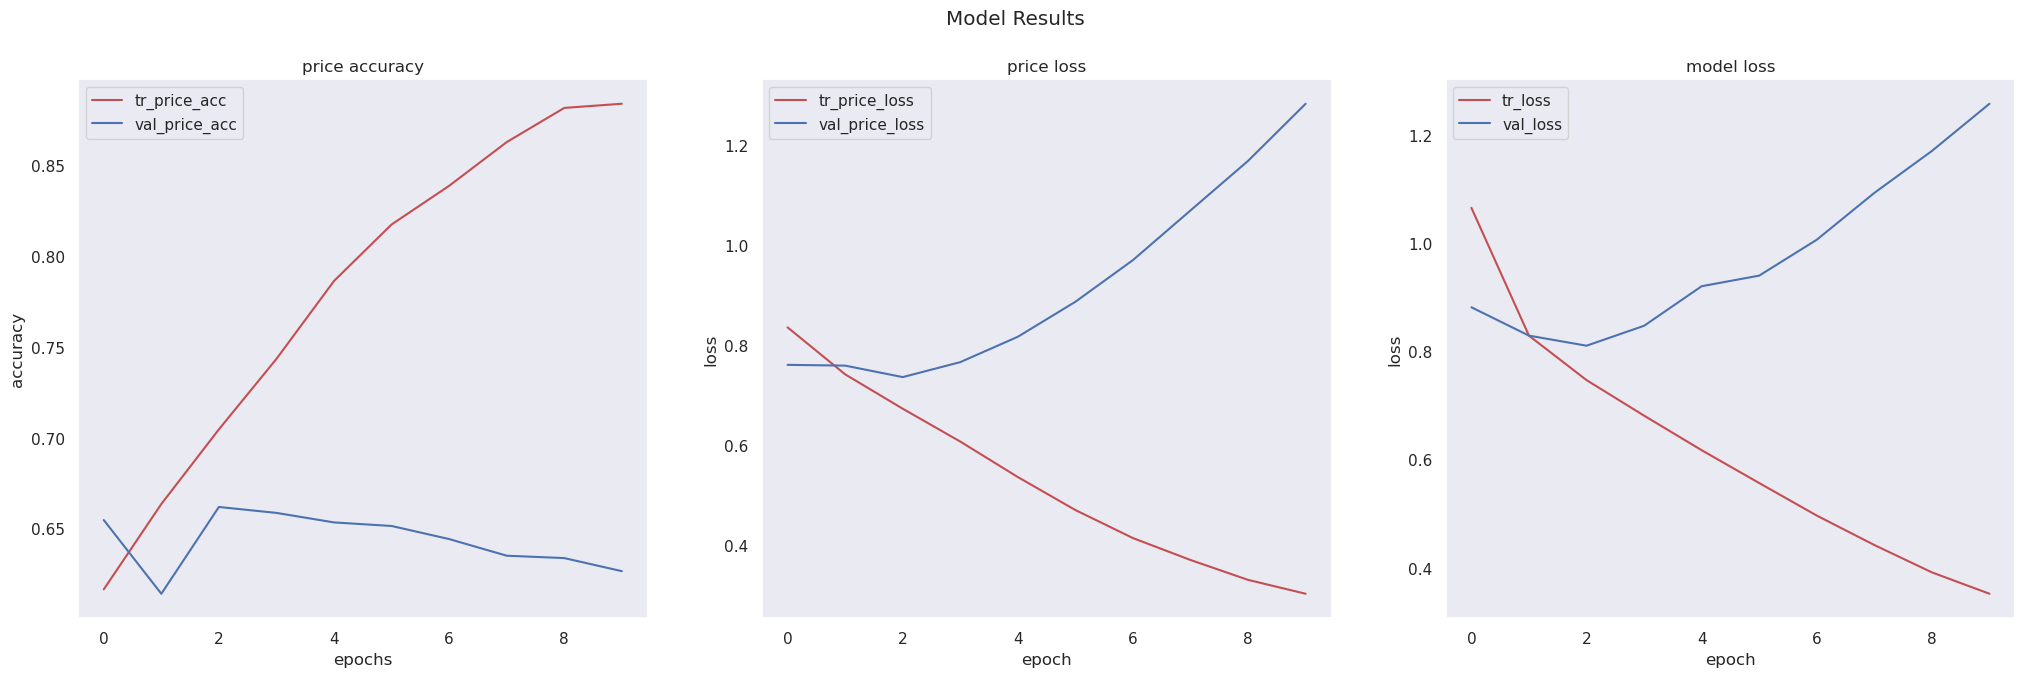

In [43]:
Results_vir(history)

In [44]:
#___________________________CSV creator which will be used to save the csv file_______________________________________________
pd.DataFrame(
    {'id': Ts_df.index,
     'price': price_category_predicted}
).to_csv('Model_4_submission.csv', index=False)

**OBSERVATION_4**

> In this trial we start with bidirectional GRU layer with No summary translation and adding quadratic regularizer

> The score on local was ~63.4%  

> We need more improvements 

# Trial 5 (Using summary translation)

For trial 5: With improvements to performance arising from changing the text part of the network, let's see what happens when we add depth to the CNN for the image part of the network.

### Apply data preprocessing like Text Translation on train and test data

In [48]:
"""Translate text from source language to destination language

:param text: The source text(s) to be translated. Batch translation is supported via sequence input.
:type text: UTF-8 str; unicode; string sequence (list, tuple, iterator, generator)

:param dest: The language to translate the source text into. in our data we have for example french language so we will translate it to english"""
from googletrans import Translator
translator = Translator()
Tr_df['translate_summary']= Tr_df['summary'].apply(lambda x: translator.translate(x,dest='en').text)
Ts_df['translate_summary']= Ts_df['summary'].apply(lambda x: translator.translate(x,dest='en').text)

In [49]:
# print the train data after translate_summary column added 
Tr_df.head()

,summary,image,type,price,translate_summary
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,1,1,"Spacious, sunny and cozy modern apartment in t..."
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,1,0,Located in one of the most vibrant and accessi...
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,1,1,Pretty and cozy accommodation 10 minutes from ...
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,1,1,"Beautiful and spacious (1076 sc ft, / 100 mc) ..."
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,1,0,Very large ''rustic'' and very pleasant apartm...


In [50]:
# check the translate_summary after make traslate on summary column
Ts_df['translate_summary']

0       Charming warm house is ready to host you here ...
1       The room is spacious and bright, in an apartme...
2       Large comfortable room located in the basement...
3       Near a Metro, orange line. 10 minutes walking....
4       Very bright appartment and very cosy. 2 separa...
                              ...                        
7355    Large, fully-furnished flat with brick walls a...
7356    Accommodation located at the top of a duplex. ...
7357    My place is close to parks, . My place is good...
7358    *** For security reasons, I will prioritize gu...
7359    Stay in an amazing area of Montreal! 5-7 min f...
Name: translate_summary, Length: 7360, dtype: object

In [51]:
Tr_text_trans = Tr_df.translate_summary.astype('str')

In [66]:
#check the summary values if we have any null data after drop null values 
Tr_df.isnull().sum()

summary              301
image                  0
type                   0
price                  0
translate_summary      0
dtype: int64

In [67]:
#Here we drop the null values 
Tr_df.dropna(inplace = True)
Tr_df.isnull().sum()

summary              0
image                0
type                 0
price                0
translate_summary    0
dtype: int64

In [68]:
Tr_text_id_trans = _preprocess(Tr_text_trans) # padding is done inside
# print the shape of x_train_text_id 
print(Tr_text_id_trans.shape)

(7627, 100)


### Data Preprocessing For Testing data, Here we use the trained tokenizer to pre-process the testing set.

In [116]:
# loading train images:
Ts_image = np.array([load_image('/kaggle/input/copy-of-cisc-873-dm-w23-a4/a4/'+str(i)) for i in tqdm(Ts_df["image"])])

Ts_text_id_trans = _preprocess(Ts_df.translate_summary.astype('str')) # loading summary: (force convert some of the non-string cell to string)

  0%|          | 0/7360 [00:00<?, ?it/s]

In [80]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))          # input shape for batches of text sequences (300 words long)
in_image = keras.Input(batch_shape=(None, 64, 64, 2))       # input shape for batches of images (size: 64x64x2)
#___________________________________________________________________________________________________
# text part
# simple average of embedding. 
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text) # get our word embeddings
averaged = tf.reduce_mean(embedded, axis=1)          # compute the mean of the embeddings to reduce the rank of the embedding
#___________________________________________________________________________________________________
# image part 
# simple conv2d.
cov1 = Conv2D(10, (16, 16) , activation='relu')(in_image)   # convolutional layer with 10 filters, and a 16x16 mask, no padding
dropout = Dropout(.4)(cov1)                                # 40% dropout
pl = MaxPool2D((16, 16))(dropout)                            # max pooling with a 16x16 mask, reducing the size to 3x3x10
flattened = Flatten()(pl)                                  # flatten the shape to (90,)

# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)            # concatenate text features with images

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)
#___________________________________________________________________________________________________

# define model input/output using keys.
Model_5 = keras.Model(
    inputs={
        'summary': in_text,  # text inputs
        'image': in_image   }, # images inputs

    outputs={
        'type': p_type,      # label 1: type category [0-23]
        'price': p_price   } # label 2: price category (0, 1, or 2)
    
)
#___________________________________________________________________________________________________
# compile model with optimizer, loss values for each task, 
# loss weights for each task.
Model_5.compile(
    optimizer= Adam(.001),       # using Adam for optimization with learning rate (.001)
    loss={
        'type': 'sparse_categorical_crossentropy',# measuring sparse categorical cross-entropy loss for both price and type labels
        'price': 'sparse_categorical_crossentropy',# sparse categorical cross-entropy is used since our labels are integers
    },
    loss_weights={     # Not equally weight the loss w.r.t. both labels as we care more with price
        'type': 0,
        'price': 1.0,  },
    metrics={     # evaluation metric for this task is accuracy, so we measure sparse categorical accuracy for both targets
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'], },
)
# display the structure of the model that we defined  
Model_5.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_9 (Conv2D)              (None, 49, 49, 10)   5130        ['input_16[0][0]']               
                                                                                                  
 input_15 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 dropout_5 (Dropout)            (None, 49, 49, 10)   0           ['conv2d_9[0][0]']               
                                                                                            

In [81]:
history = Model_5.fit(
    x={
        'summary': Tr_text_id_trans,
        'image': Tr_image },
    y={
        'type': Tr_Y_type,
        'price': Tr_Y_price, },
    epochs=5,
    batch_size=19,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10, ) ],
    verbose=1
)

Epoch 1/5


2023-04-14 03:05:40.371204: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_7/dropout_5/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


322/322 [==============================] - 18s 51ms/step - loss: 0.8330 - price_loss: 0.8330 - type_loss: 3.2306 - price_sparse_categorical_accuracy: 0.6220 - type_sparse_categorical_accuracy: 0.0026 - val_loss: 0.7749 - val_price_loss: 0.7749 - val_type_loss: 3.2346 - val_price_sparse_categorical_accuracy: 0.6343 - val_type_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/5
322/322 [==============================] - 6s 18ms/step - loss: 0.7326 - price_loss: 0.7326 - type_loss: 3.2373 - price_sparse_categorical_accuracy: 0.6645 - type_sparse_categorical_accuracy: 0.0018 - val_loss: 0.7188 - val_price_loss: 0.7188 - val_type_loss: 3.2374 - val_price_sparse_categorical_accuracy: 0.6756 - val_type_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/5
322/322 [==============================] - 4s 13ms/step - loss: 0.6615 - price_loss: 0.6615 - type_loss: 3.2325 - price_sparse_categorical_accuracy: 0.7105 - type_sparse_categorical_accuracy: 0.0015 - val_loss: 0.7027 - val_price_loss: 0.7027 - va

In [82]:
# we can do prediction on training set
y_predict = Model_5.predict(
    {
        'summary': Ts_text_id_trans,
        'image': Ts_image  }
)
price_predicted = y_predict['price'] # probabilities
price_category_predicted = np.argmax(price_predicted, axis=1) # categories

230/230 [==============================] - 1s 2ms/step


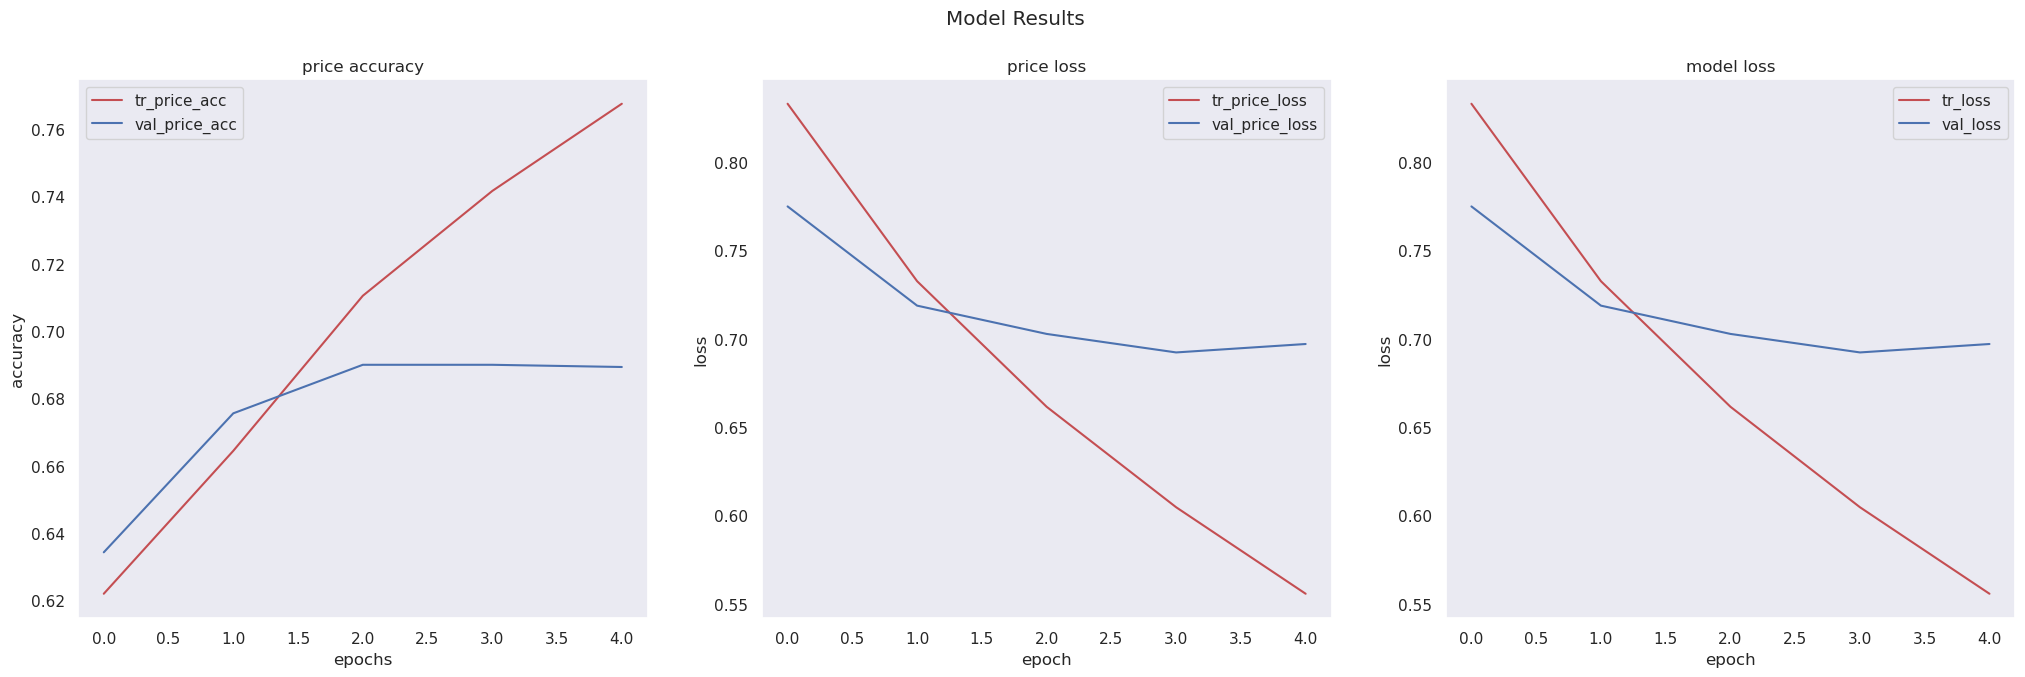

In [83]:
Results_vir(history)

In [84]:
#___________________________CSV creator which will be used to save the csv file_______________________________________________
pd.DataFrame(
    {'id': Ts_df.id,
     'price': price_category_predicted}
).to_csv('Model_5_submission.csv', index=False)

**OBSERVATION_5**

> In this trial we start with add depth to the CNN for and using summary translation 

> The score on local was ~68.5%  

# Trial 6 (Using summary translation)

* In this trial, use different preprocessing after make translation on the summary text and by using lstm

In [85]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))
#___________________________________________________________________________________________________
# text part
embedded = Embedding(tokenizer.num_words, 100)(in_text) # simple average of embedding. you can change it to anything else as needed
lst = LSTM(64)(embedded)
dense= Dense(32,activation='relu')(lst)
#___________________________________________________________________________________________________
# image part 
# simple conv2d. you can change it to anything else as needed
cov1 = Conv2D(64, (15, 15) , activation='relu')(in_image) # 32 number of filters  and  (16, 16) size of filter
pl = MaxPool2D((5, 5))(cov1)
flattened = Flatten()(pl)
fused = tf.concat([dense, flattened], axis=-1) # fusion - combinig both
# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)

#___________________________________________________________________________________________________
# define model input/output using keys.
Model_6= keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)
#___________________________________________________________________________________________________
# compile model with optimizer, loss values for each task, loss 
# weights for each task.
Model_6.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy', },
    loss_weights={
        'type': 0.5,
        'price': 0.5, },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],   },
)
Model_6.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 input_18 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 embedding_8 (Embedding)        (None, 100, 100)     4000000     ['input_17[0][0]']               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 50, 50, 64)   28864       ['input_18[0][0]']               
                                                                                            

In [86]:
history = Model_6.fit(
    x={
        'summary': Tr_text_id_trans,
        'image': Tr_image  },
    y={
        'type': Tr_Y_type,
        'price': Tr_Y_price,  },
    epochs=5,
    batch_size=19,
    validation_split=0.2,
    callbacks=[ tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10, ) ],
    verbose=1
)

Epoch 1/5
322/322 [==============================] - 23s 62ms/step - loss: 1.0290 - price_loss: 0.8559 - type_loss: 1.2021 - price_sparse_categorical_accuracy: 0.6192 - type_sparse_categorical_accuracy: 0.7514 - val_loss: 0.9031 - val_price_loss: 0.8310 - val_type_loss: 0.9751 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 2/5
322/322 [==============================] - 7s 21ms/step - loss: 0.9324 - price_loss: 0.8402 - type_loss: 1.0246 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9037 - val_price_loss: 0.8313 - val_type_loss: 0.9760 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 3/5
322/322 [==============================] - 6s 18ms/step - loss: 0.9303 - price_loss: 0.8393 - type_loss: 1.0213 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 0.9071 - val_price_loss: 0.8320 - 

In [87]:
# we can do prediction on training set
y_predict = Model_6.predict(
    {
        'summary': Ts_text_id_trans,
        'image': Ts_image }
)
price_predicted = y_predict['price'] # probabilities
price_category_predicted = np.argmax(price_predicted, axis=1) # categories

230/230 [==============================] - 2s 4ms/step


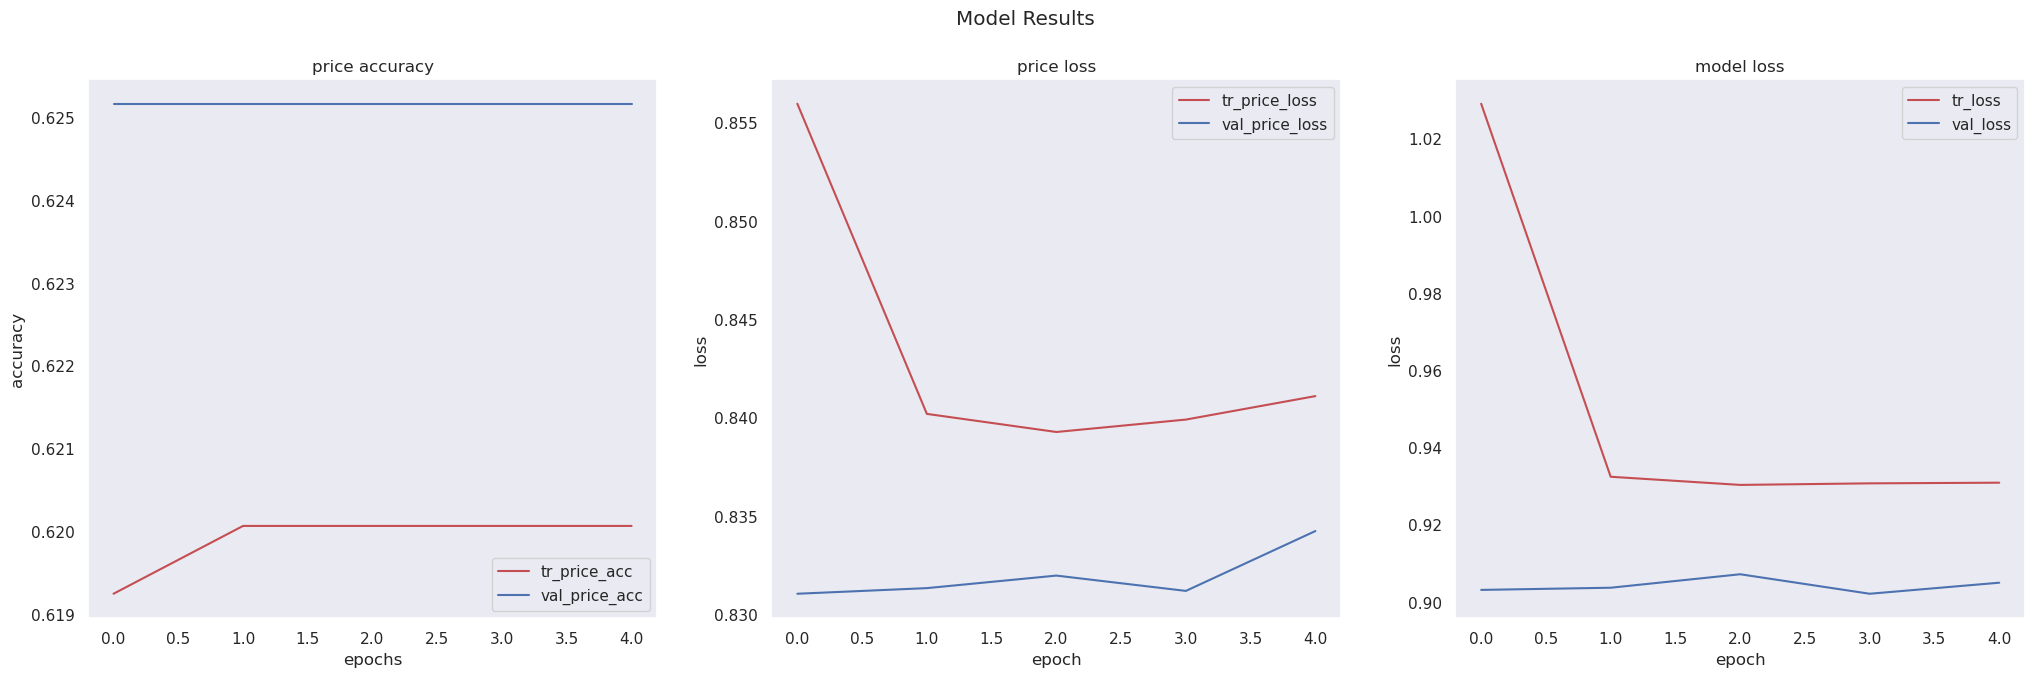

In [88]:
Results_vir(history)

In [89]:
#___________________________CSV creator which will be used to save the csv file_______________________________________________
pd.DataFrame(
    {'id': Ts_df.id,
     'price': price_category_predicted}
).to_csv('Model_6_submission.csv', index=False)

**OBSERVATION_6**

> In this trial we start with different preprocessing after make translation on the summary text and by using lstm

> The score on local was ~62%  


# The last Trial 

In [110]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))
#___________________________________________________________________________________________________
# text part
# simple average of embedding.
embedded = keras.layers.Embedding(tokenizer.num_words, 100)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)
#___________________________________________________________________________________________________
# image part 
# simple conv2d. 
cov1 = Conv2D(10,(16,16), activation='tanh')(in_image) # 10 number of filters  and  (15, 15) size of filter
vgg=VGG19(weights=None, input_shape=(49, 49, 10), include_top=True)(cov1)
flattened = Flatten()(vgg)
# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)
# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)
#___________________________________________________________________________________________________
# define model input/output using keys.
Model_7= keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image  },
    outputs={
        'type': p_type,
        'price': p_price,  },
)
#___________________________________________________________________________________________________
# compile model with optimizer, loss values for each task, loss 
# weights for each task.
Model_7.compile(
    optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    epsilon=1e-05,
    ema_momentum=0.99,
),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy', },
    loss_weights={
        'type': 0.7,
        'price': 0.3,        },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],  },
)
Model_7.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_40 (InputLayer)          [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_39 (InputLayer)          [(None, 100)]        0           []                               
                                                                                                  
 conv2d_18 (Conv2D)             (None, 49, 49, 10)   5130        ['input_40[0][0]']               
                                                                                                  
 embedding_16 (Embedding)       (None, 100, 100)     4000000     ['input_39[0][0]']               
                                                                                           

In [111]:
history = Model_7.fit(
    x={
        'summary': Tr_text_id_trans,
        'image': Tr_image },
    y={
        'type': Tr_Y_type,
        'price': Tr_Y_price,},
    epochs=10,
    batch_size=27,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10, )],
    verbose=1
)

Epoch 1/10
226/226 [==============================] - 32s 108ms/step - loss: 2.4983 - price_loss: 1.0772 - type_loss: 3.1074 - price_sparse_categorical_accuracy: 0.5924 - type_sparse_categorical_accuracy: 0.6504 - val_loss: 2.4227 - val_price_loss: 1.0472 - val_type_loss: 3.0122 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 2/10
226/226 [==============================] - 15s 65ms/step - loss: 2.3016 - price_loss: 1.0048 - type_loss: 2.8574 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 2.1432 - val_price_loss: 0.9532 - val_type_loss: 2.6531 - val_price_sparse_categorical_accuracy: 0.6252 - val_type_sparse_categorical_accuracy: 0.7647
Epoch 3/10
226/226 [==============================] - 10s 45ms/step - loss: 1.9548 - price_loss: 0.9122 - type_loss: 2.4016 - price_sparse_categorical_accuracy: 0.6201 - type_sparse_categorical_accuracy: 0.7536 - val_loss: 1.7360 - val_price_loss: 0.8

In [112]:
# we can do prediction on training set
y_predict = Model_7.predict(
    {
        'summary': Ts_text_id_trans,
        'image': Ts_image }
)
price_predicted = y_predict['price'] # probabilities
price_category_predicted = np.argmax(price_predicted, axis=1) # categories

230/230 [==============================] - 2s 10ms/step


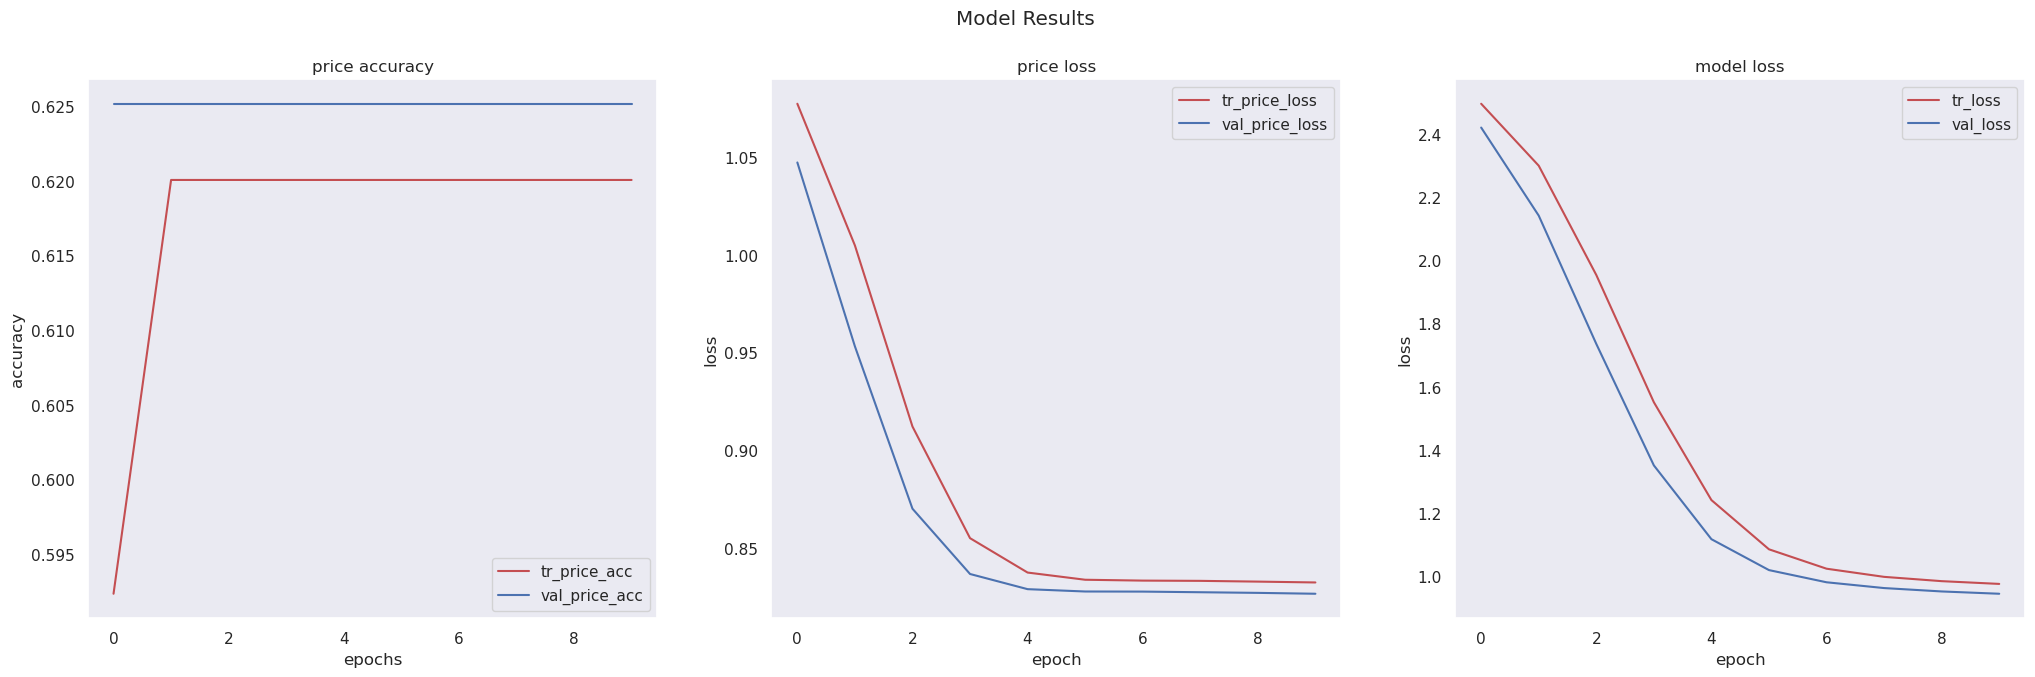

In [113]:
Results_vir(history)

In [114]:
#___________________________CSV creator which will be used to save the csv file_______________________________________________
pd.DataFrame(
    {'id': Ts_df.id,
     'price': price_category_predicted}
).to_csv('Model_7_submission.csv', index=False)

**OBSERVATION_7**

> In this trial we start with pretrained model which is vgg19

> The score on local was ~62%  

5- ✔️ Answer some of questions (briefly)

### ---------------------------------------------------------------The Questions---------------------------------------------------------

* 🌈Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?
* 🌈What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?
* 🌈What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment ?
* 🌈What is the difference among xgboost, lightgbm and catboost ?

### ---------------------------------------------------------------Answer The Questions---------------------------------------------------------

* 🌈**Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?**

* A fully connected model is a good one for sequential data when there is a strong correlation between the input and output data. However, it may not be the best choice for sequential data with long-term dependencies.

* For image data, fully connected layers are not good because they require a lot of parameters and can lead to overfitting. Instead, convolutional neural networks (CNNs) are used for image data because they can learn spatial hierarchies of features by using shared weights and biases

* 🌈**What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?**

* Gradient vanishing and gradient explosion are problems that can occur when training deep neural networks. Gradient vanishing occurs when the gradients become too small and cause the network to stop learning. Gradient explosion occurs when the gradients become too large and cause the network to diverge.

* LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) networks are designed to solve these problems by using gates to control what information is kept and what information is thrown out. This allows the networks to learn long-term dependencies which is not possible with traditional neural networks.

* 🌈**What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment ?**

* Multi-task learning is a subfield of machine learning in which multiple learning tasks are solved at the same time, while exploiting commonalities and differences across tasks. Multi-task learning is inherently a multi-objective problem because different tasks may conflict, necessitating a trade-off. Multi-modal learning is teaching a concept using more than one mode. By engaging the mind in multiple learning styles at the same time, learners experience a diverse learning style that collectively suits all of them.
* We use it by make train on text data and image data at the same time
* As in this assignment we use one model to work on text and image at the same time Inputs (two modalities): (text data) (image data)

* 🌈**What is the difference among xgboost, lightgbm and catboost ?**

* XGBoost, LightGBM and CatBoost are all gradient boosting algorithms that are used for supervised learning problems such as classification and regression. They are all based on decision trees and have similar functionalities but differ in their implementation and performance.

* CatBoost builds symmetric (balanced) trees, unlike XGBoost and LightGBM which build asymmetric trees. In every step, leaves from the previous tree are split using the same condition. The feature-split pair that accounts for the lowest loss is selected and used for all the level’s nodes.

* LightGBM uses leaf-wise (best-first) tree growth. It chooses to grow the leaf that minimizes the loss, allowing a growth of an imbalanced tree. This results in smaller and faster models compared to XGBoost.

* XGBoost grows level-wise (breadth-first) while LightGBM grows leaf-wise (depth-first). XGBoost is known for its scalability, speed, and performance while LightGBM is known for its accuracy and efficiency.

* Each framework has an extensive list of tunable hyperparameters that affect learning and eventual performance. CatBoost has a built-in categorical feature handling mechanism which makes it easier to work with categorical data. Unlike CatBoost or LightGBM, XGBoost cannot handle categorical features by itself, it only accepts numerical values similar to Random Forest.